In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [3]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)

from bokeh.io import output_notebook, output_file, show, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool
from bokeh.models.widgets import Tabs, Panel
output_notebook()

from IPython.html.widgets import interact

from bubbly.bubbly import bubbleplot
%matplotlib inline

Loading BokehJS ...

c:\users\nikunjgoel\appdata\local\programs\python\python36\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



In [7]:
origDF = pd.read_csv('C:\study_material\Masters\INFSCI_2725_Data_Analytics\DAProject\\appstore_games.csv')

In [8]:
origDF.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [9]:
origDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [10]:
origDF.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [11]:
ForVisualDF = origDF.drop(['URL','ID','Name','Subtitle','Icon URL','Description','Original Release Date','Current Version Release Date','Genres','Developer','Languages','In-app Purchases'],axis=1)

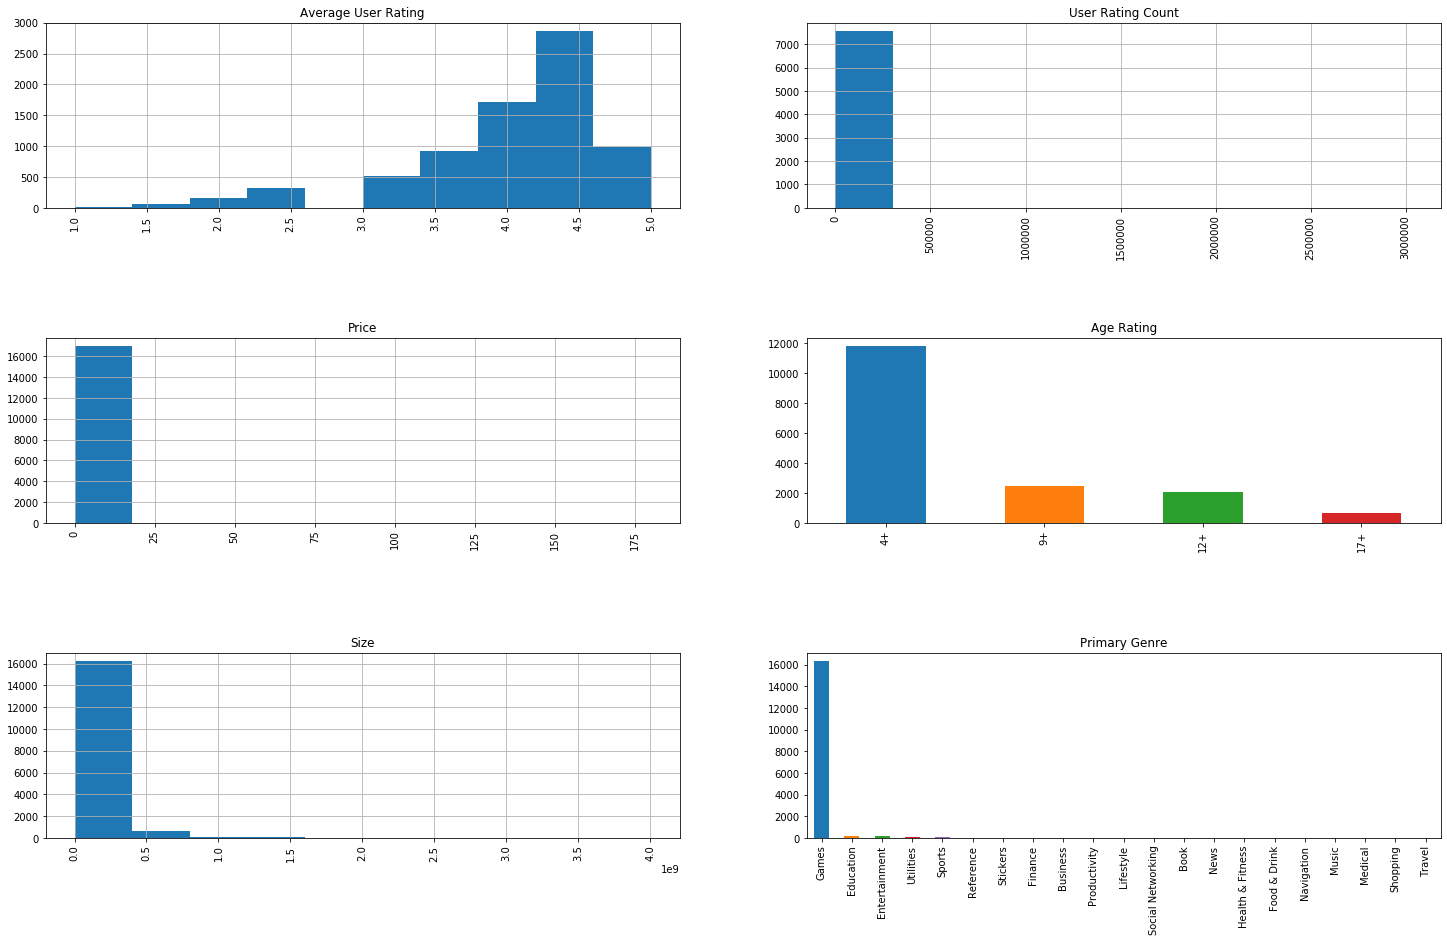

In [13]:
fig = plt.figure(figsize=(25, 15))
cols = 2
rows = np.ceil(float(ForVisualDF.shape[1]) / cols)
for i, column in enumerate(ForVisualDF.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if ForVisualDF.dtypes[column] == np.object:
        ForVisualDF[column].value_counts().plot(kind="bar", axes=ax)
    else:
        ForVisualDF[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

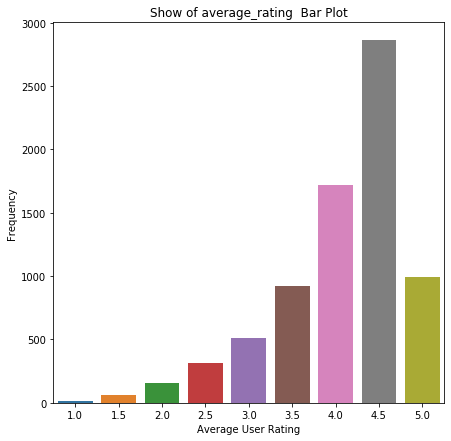

In [15]:
plt.figure(figsize=(7,7))
sns.barplot(x=origDF['Average User Rating'].value_counts().index,
              y=origDF['Average User Rating'].value_counts().values)
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.title('Show of average_rating  Bar Plot')
plt.show()

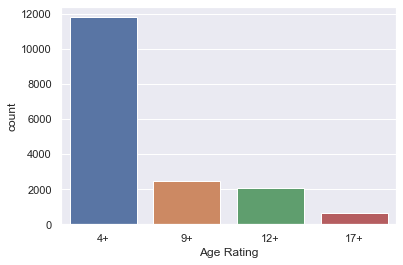

In [17]:
sns.set()
sns.countplot(x="Age Rating", data=origDF);

In [26]:
origDF['Name'][:20]

0                             Sudoku
1                            Reversi
2                            Morocco
3                      Sudoku (Free)
4                       Senet Deluxe
5     Sudoku - Classic number puzzle
6                        Gravitation
7                             Colony
8                              Carte
9                   "Barrels O' Fun"
10                         Quaddraxx
11                        Lumen Lite
12                         BubblePop
13                            Marple
14                     Tetravex Lite
15          Awele/Oware - Mancala HD
16          Awele/Oware - Mancala HD
17                        Chess Game
18                      Catcha Mouse
19       Cool Sudoku, Jigsaw, Killer
Name: Name, dtype: object

In [27]:
origDF['User Rating Count'][:20]

0       3553.0
1        284.0
2       8376.0
3     190394.0
4         28.0
5         47.0
6         35.0
7        125.0
8         44.0
9        184.0
10         NaN
11      5072.0
12       526.0
13       989.0
14      2358.0
15       112.0
16       112.0
17       504.0
18     95971.0
19       357.0
Name: User Rating Count, dtype: float64

In [19]:
origDFsort1 = origDF.sort_values(by=["User Rating Count"], ascending=True)

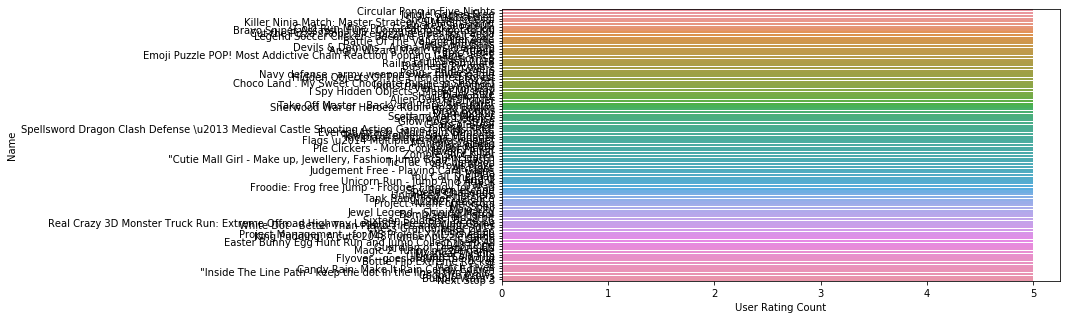

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(origDFsort1['User Rating Count'][:100],origDFsort1['Name'][:100])
plt.show()

In [28]:
origDFsort1[['Name','User Rating Count','Average User Rating']].head(4000)

,Name,User Rating Count,Average User Rating
4891,Circular Pong in Five Nights,5.0,3.0
626,Jungle Games Free,5.0,4.0
7114,2048&Emoji,5.0,5.0
2867,Shogi Lite -Chess-,5.0,4.0
2866,Shogi Lite -Chess-,5.0,4.0
2858,Killer Ninja Match: Master Strategy 3-Match Game,5.0,4.5
10977,Hockey Shootout!,5.0,3.5
2894,Gold Run Mine Pro: Great Pocket Edition,5.0,3.5
10983,Bravo Sniper Assassin Fury. Commando Shoot to ...,5.0,4.0
2797,Cut the Pizza : Rope slice pizza recipes for P...,5.0,3.0


In [28]:
origDFsort = origDF.sort_values(by=["User Rating Count"], ascending=False)

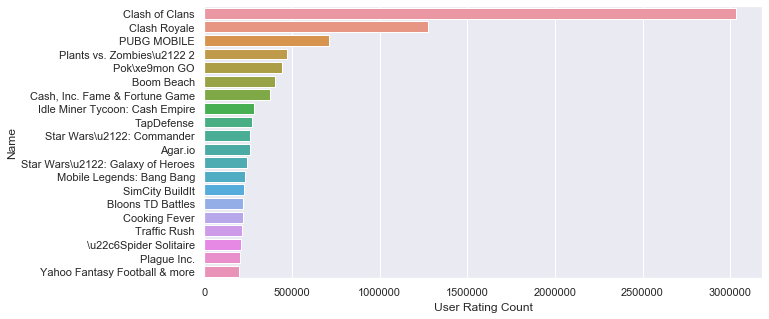

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(origDFsort['User Rating Count'][:20],origDFsort['Name'][:20])
plt.show()

#plt.figure(figsize=(10,5))
#sns.barplot(

#origDF.User_Rating_Count

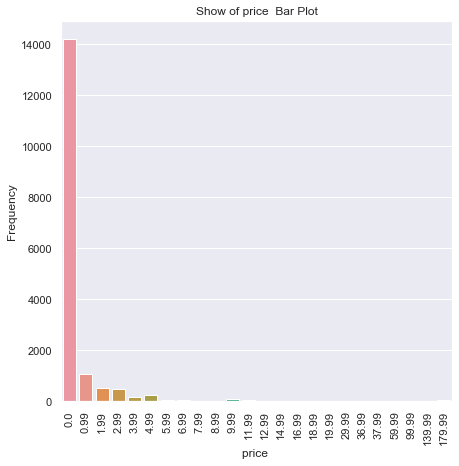

In [19]:
plt.figure(figsize=(7,7))
sns.barplot(x=origDF['Price'].value_counts().index,
              y=origDF['Price'].value_counts().values)
plt.xlabel('price ')
plt.ylabel('Frequency')
plt.title('Show of price  Bar Plot')
plt.xticks(rotation=90)
plt.show()

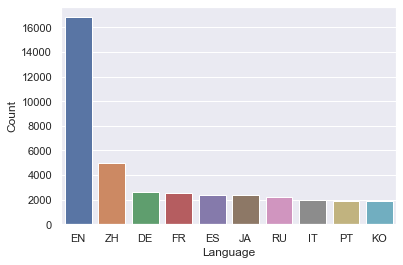

In [30]:
languages = pd.DataFrame(origDF['Languages'].str.split(', ',expand=True))

languages = pd.DataFrame(languages.values.ravel(), columns = ["Languages"])

languages = pd.DataFrame(languages['Languages'].value_counts().reset_index())

languages.columns = ['Language', 'Count']

sns.barplot(x="Language", y="Count", data=languages.head(10));

In [33]:
origDF['Original Release Date'] = pd.to_datetime(origDF['Original Release Date'])

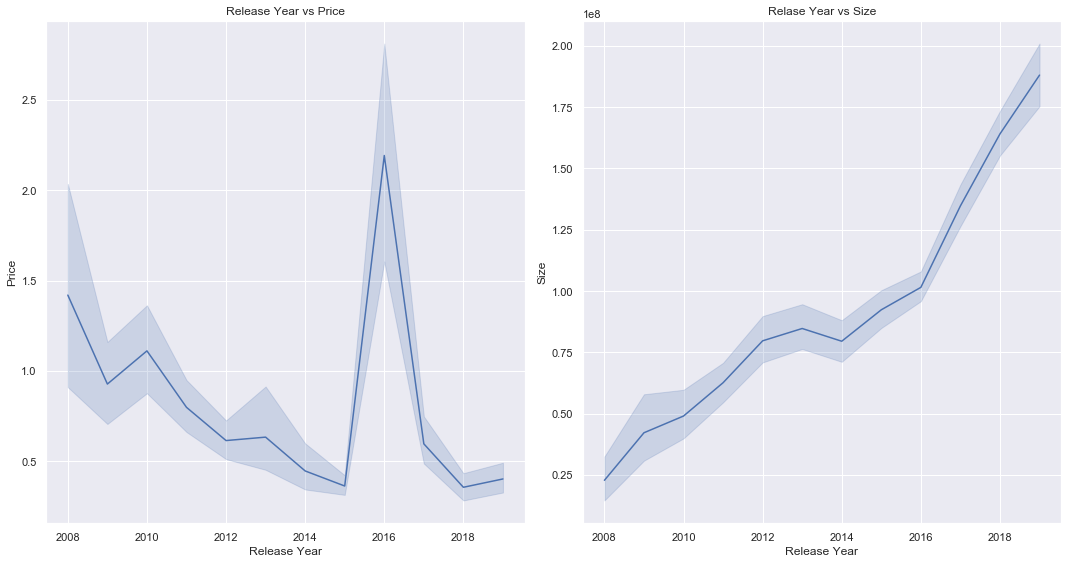

In [34]:
origDF['Release Year'] = origDF['Original Release Date'].dt.year

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.lineplot(x='Release Year', y='Price', data=origDF, palette='Wistia', ax=ax[0])
ax[0].set_title('Release Year vs Price')

sns.lineplot(x='Release Year', y='Size', data=origDF, palette='Wistia', ax=ax[1])
ax[1].set_title('Relase Year vs Size')
plt.tight_layout()
plt.show()

In [52]:
origDF[origDF['Release Year']==2016][['Price','Release Year']]

,Price,Release Year
127,0.00,2016
2563,0.00,2016
3131,0.00,2016
3376,0.00,2016
3422,0.00,2016
3966,0.00,2016
3975,0.00,2016
4169,0.00,2016
4490,0.00,2016
4553,0.00,2016


In [44]:
practiseDF = origDF

In [51]:
practiseDF.dropna(inplace=True)
data = practiseDF.set_index('Release Year')
y = data.loc[2008].Size
x = data.loc[2008].Price
data = data[['Name', 'Price', 'Size']]
output_notebook()

Loading BokehJS ...

In [53]:
origDF.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Release Year
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30,29/04/2019,2008
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",2008-09-24,26/04/2019,2008
75,https://apps.apple.com/us/app/gun-runner/id306...,306165224,Gun Runner +,A trading game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,5462.0,0.00,"0.99, 0.99, 0.99","""Gun Runner + is a lite & free version of Gun ...",CUBIC digital,9+,EN,14125056.0,Games,"Games, Entertainment, Adventure, Strategy",2009-02-25,28/09/2017,2009
90,https://apps.apple.com/us/app/uniwar-multiplay...,311456818,UniWar: Multiplayer Strategy,Turn-Based Strategy game,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,14073.0,0.00,"9.99, 2.99, 4.99, 19.99, 5.49, 23.49, 49.99, 3...",Players take turns building their army and fig...,SH Limited,9+,"AR, ZH, CS, EN, FR, DE, IT, JA, PL, PT, RU, ES...",115074048.0,Games,"Games, Entertainment, Strategy, Role Playing",2009-04-14,24/07/2019,2009
106,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",Evil aliens are coming to turn your beloved sh...,Limbic Software,9+,"EN, DE",56048640.0,Games,"Games, Strategy, Puzzle",2009-05-24,5/03/2018,2009


In [54]:
origDF[origDF['Average User Rating']>=4.0].head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Release Year
106,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",Evil aliens are coming to turn your beloved sh...,Limbic Software,9+,"EN, DE",56048640.0,Games,"Games, Strategy, Puzzle",2009-05-24,5/03/2018,2009
118,https://apps.apple.com/us/app/chess/id319305999,319305999,Chess,Play Chess and Solve Puzzles,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,14864.0,0.00,"1.99, 7.99, 29.99, 19.99",Chess is #1 popular game in the world. Accordi...,Vintolo Ltd,4+,EN,47129600.0,Games,"Games, Strategy, Board, Entertainment",2009-06-13,21/06/2019,2009
127,https://apps.apple.com/us/app/pixel-starships/...,321756558,Pixel Starships\u2122,Online 8Bit Star Ship Trek,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,27739.0,0.00,"4.99, 9.99, 3.99, 4.99, 3.99, 9.99, 19.99, 49....","""Featured by Apple in Best New Games! From one...",Savy Soda,9+,"AR, CS, NL, EN, FR, DE, ID, IT, JA, KO, PL, PT...",104436736.0,Games,"Games, Entertainment, Strategy, Role Playing",2016-06-01,22/07/2019,2016
128,https://apps.apple.com/us/app/pushy/id322110989,322110989,PUSHY,A LOGIC GAME & A LOT OF FUN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,163.0,1.99,0.99,"""BEST MOBILE APP FOR KIDS"" Award\n(Children So...",medienwerkstatt,4+,"EN, FR, DE",83070976.0,Games,"Games, Puzzle, Strategy, Education",2009-11-07,8/04/2019,2009
156,https://apps.apple.com/us/app/chess-play-learn...,329218549,Chess - Play & Learn,Play chess online with friends,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,143719.0,0.00,"99.99, 6.99, 14.99, 29.99, 49.99, 4.99","""Play chess online with millions of players ar...",Chess.com,4+,"AF, SQ, AR, HY, AZ, EU, BE, BN, BS, BG, CA, HR...",109671424.0,Games,"Games, Strategy, Board, Entertainment",2009-10-29,24/07/2019,2009


In [55]:
RatingDF = origDF[origDF['Average User Rating']>=4.0]

In [60]:
(RatingDF['Size']/(1024*1024)).value_counts()

208.585938     2
16.213867      2
148.559570     2
71.779297      2
92.998047      2
40.150391      2
110.180664     2
298.626953     2
196.812500     2
96.835938      2
153.441406     2
112.254883     2
228.400391     2
66.805664      2
300.342773     2
217.668945     2
161.227539     2
21.552734      2
161.987305     2
209.348633     2
240.703125     2
68.159180      2
360.010742     2
282.978516     2
75.694336      2
182.781250     2
149.325195     1
225.343750     1
249.327148     1
176.373047     1
              ..
278.167969     1
165.699219     1
21.105469      1
29.846680      1
1117.458008    1
106.337891     1
172.672852     1
182.666992     1
157.141602     1
331.334961     1
134.667969     1
378.896484     1
73.776367      1
159.032227     1
162.670898     1
21.708984      1
356.750000     1
532.021484     1
247.681641     1
53.552734      1
55.418945      1
103.078125     1
21.392578      1
586.706055     1
257.353516     1
273.355469     1
14.377930      1
18.709961     

In [12]:
ForVisualDF.head()

,Average User Rating,User Rating Count,Price,Age Rating,Size,Primary Genre
0,4.0,3553.0,2.99,4+,15853568.0,Games
1,3.5,284.0,1.99,4+,12328960.0,Games
2,3.0,8376.0,0.00,4+,674816.0,Games
3,3.5,190394.0,0.00,4+,21552128.0,Games
4,3.5,28.0,2.99,4+,34689024.0,Games


In [14]:
sns.heatmap(ForVisualDF.dropna())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: Image data of dtype object cannot be converted to float

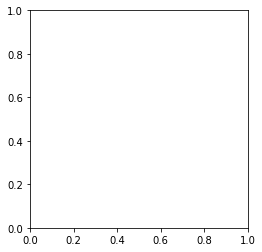

In [15]:
plt.imshow(ForVisualDF, cmap='hot', interpolation='nearest')
plt.show()

In [16]:
ForVisualDF.corr()

,Average User Rating,User Rating Count,Price,Size
Average User Rating,1.000000,0.033025,-0.000414,0.061617
User Rating Count,0.033025,1.000000,-0.011149,0.037736
Price,-0.000414,-0.011149,1.000000,0.033502
Size,0.061617,0.037736,0.033502,1.000000
